## Multiclass classification
We will classify the input into multiple output classes. 

In [25]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
len(digits.data[0]) # 64 bytes of the image

64

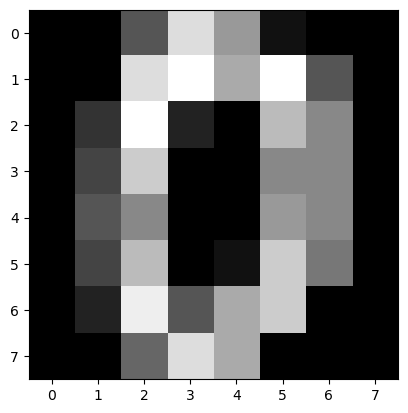

In [19]:
plt.imshow(digits.images[0], cmap="gray")

In [21]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
digits.target[0]

np.int64(0)

In [26]:
# training and test data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8, random_state=42)
print(f"Length of training data {len(X_train)} and test data {len(X_test)}")

Length of training data 1437 and test data 360


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/dsai/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
model.score(X_test, y_test)

0.9694444444444444

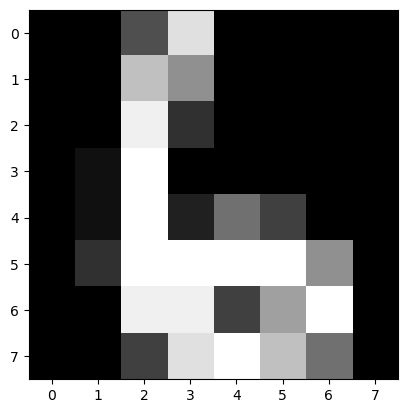

This images is of digit 6


In [32]:
select_digit = 67
plt.imshow(digits.images[select_digit], cmap="gray")
plt.show()
print(f"This images is of digit {digits.target[select_digit]}")

In [34]:
# predictions
model.predict([digits.data[67]])

array([6])

In [37]:
model.predict(digits.data[:5])

array([0, 1, 2, 3, 4])

In [39]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

Text(50.722222222222214, 0.5, 'Target')

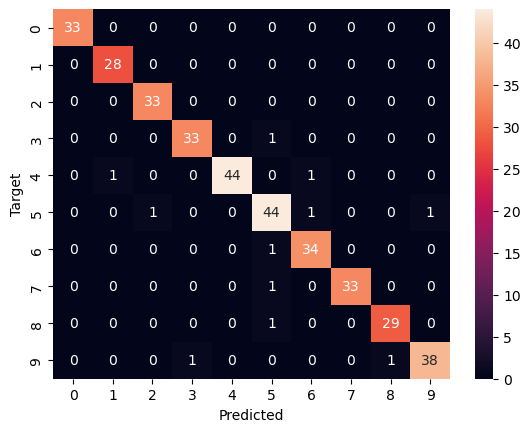

In [46]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Target")

In case of 4 and 5 we see the model not performing well and recognising digits incorrectly. So I think, we might load more data for 4 and 5 with different styles and train the model to improve accuracy.